In [ ]:
# This Notebook loads a dataset from the data cube, and displays it as an RGB plot.

In [10]:
import datacube
from datacube.storage.masking import mask_invalid_data

dc = datacube.Datacube()

In [11]:
# Prepare query parameters
fake_saturation = 40000
query = { 
    'product' : 'LC08_scene'
    , 'time' : ('2017-07-05','2017-08')
    #, 'latitude' : (47.7838, 49.93203)
    #, 'longitude' : (-124.35999, -121.14917)
    , 'resolution' : (-0.0025, 0.0025)
}

In [12]:
# Load data as an xarray.Dataset
data = dc.load(**query, measurements=['red', 'green', 'blue'])

In [13]:
# Use the masking library to strip invalid data
data = mask_invalid_data(data)
# Isolate the color dimension in an xarray.DataArray, use transpose to make color the last dimension
rgb = (data.to_array(dim='color'))
rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1])) 

# Mask out pixels where any band is 'saturated'
rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))
# Scale to [0, 1] range for imshow
rgb /= fake_saturation  

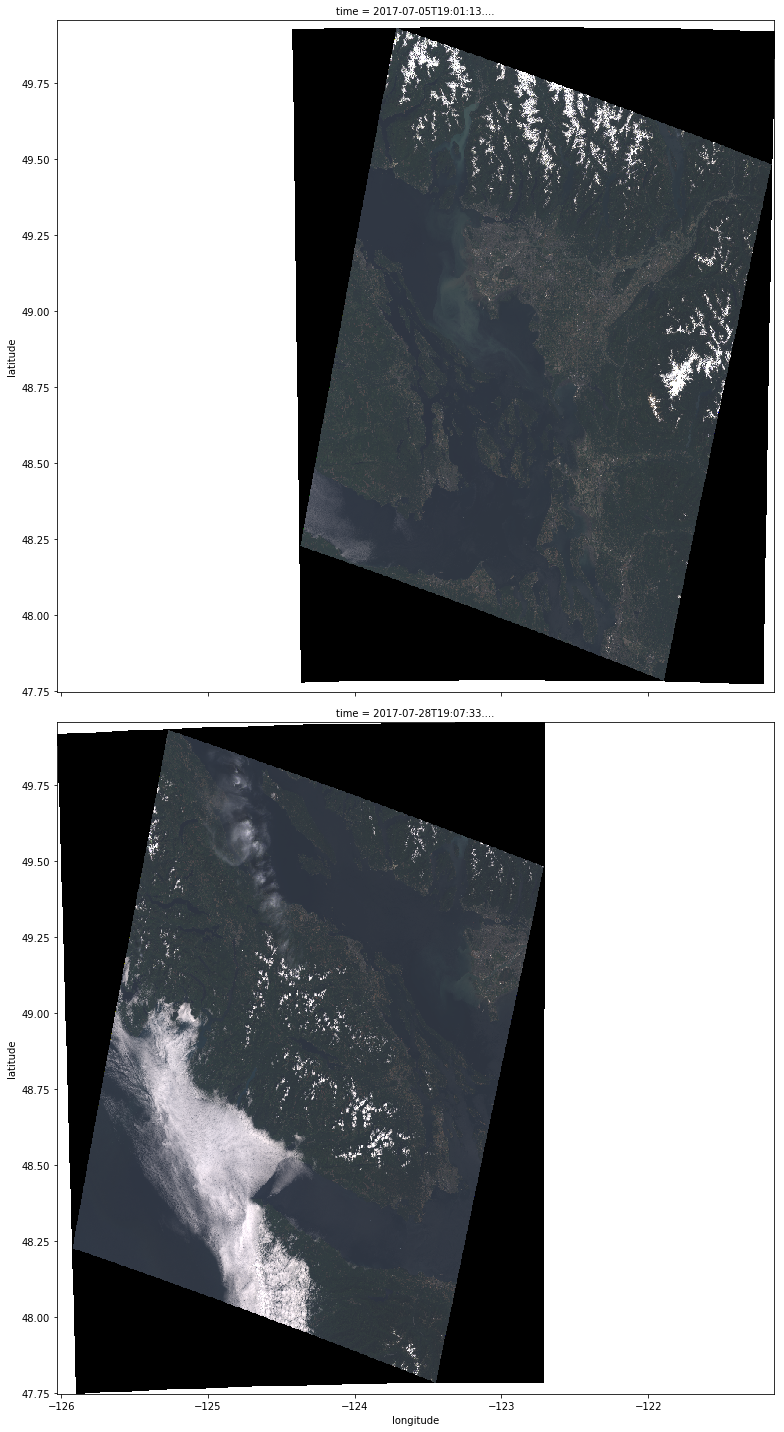

In [15]:
rgb.plot.imshow( x = data.crs.dimensions[1]
                , y = data.crs.dimensions[0]
                , col = 'time'
                , col_wrap = 1
                , size = 10
                , add_colorbar = False
               )